In [1]:
import pandas as pd

df = pd.read_csv('/Users/rohith/Documents/Datasets/bitcoin-historical-data/coinbaseUSD_1-min_data_2014-12-01_to_2018-03-27.csv')

print(df)

          Timestamp     Open     High      Low    Close  Volume_(BTC)  \
0        1417411980   300.00   300.00   300.00   300.00      0.010000   
1        1417412040   300.00   300.00   300.00   300.00      0.010000   
2        1417412100   300.00   300.00   300.00   300.00      0.010000   
3        1417412160   300.00   300.00   300.00   300.00      0.010000   
4        1417412220   300.00   300.00   300.00   300.00      0.010000   
5        1417412280   300.00   300.00   300.00   300.00      0.010000   
6        1417412340   300.00   300.00   300.00   300.00      0.010000   
7        1417412400   300.00   300.00   300.00   300.00      0.010000   
8        1417412460   300.00   300.00   300.00   300.00      0.010000   
9        1417412520   300.00   300.00   300.00   300.00      0.010000   
10       1417412580   300.00   300.00   300.00   300.00      0.010000   
11       1417412640   300.00   300.00   300.00   300.00      0.010000   
12       1417412700   300.00   300.00   300.00   30

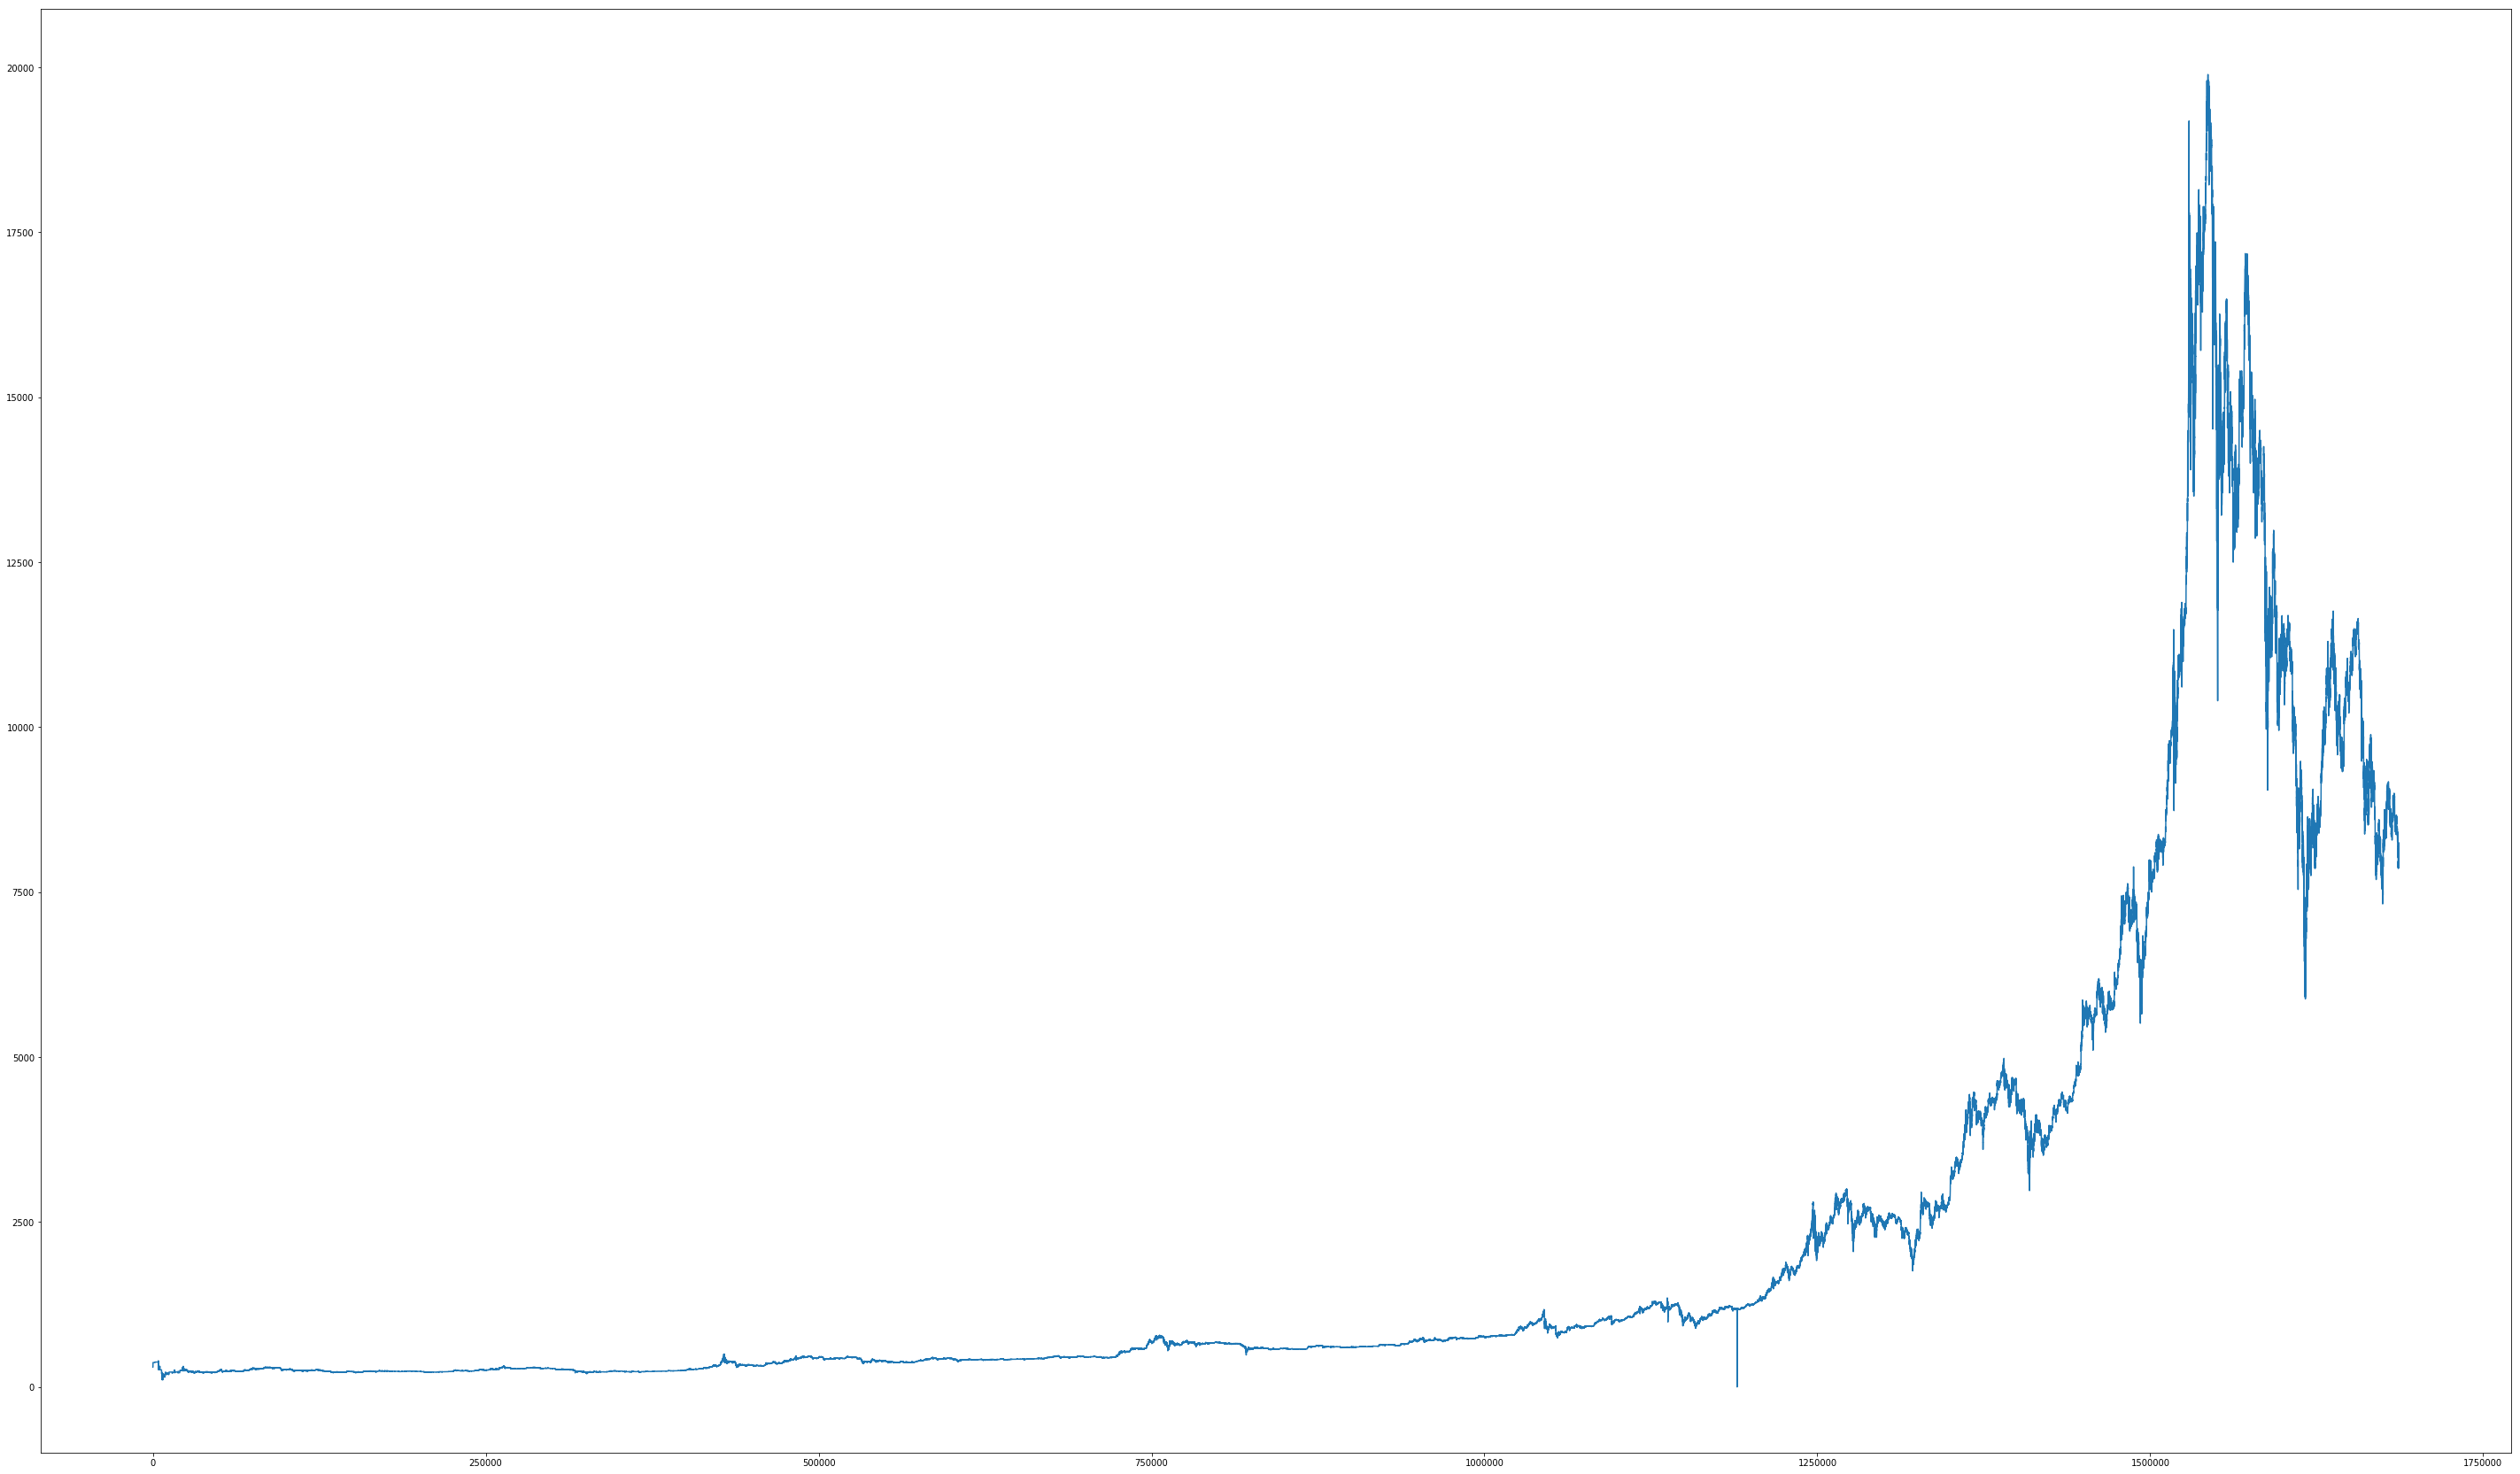

In [3]:
import matplotlib.pyplot as plt

y = df['Open']
plt.figure(figsize=(50,30))
plt.plot(range(len(y)),y)
plt.show()

In [5]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

X = df['Timestamp']
Y = df['Open']

X = np.array(X)
Y = np.array(Y)

X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

scale = MinMaxScaler((0,1))
X = scale.fit_transform(X)
Y = scale.fit_transform(Y)

/Users/rohith/anaconda3/envs/projects/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [33]:
from sklearn.cross_validation import train_test_split

x_train = []
x_test = []
y_train = []
y_test = []

x_train, x_test, y_train, y_test = train_test_split(X,Y,train_size=0.999)

In [34]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [35]:
x_train = x_train.reshape(-1,1,1)
x_test = x_test.reshape(-1,1,1)

In [36]:
print(x_train.shape)

(1684907, 1, 1)


In [37]:
from keras.models import Sequential 
from keras.layers import LSTM, Dense 

model = Sequential()
model.add(LSTM(5,input_shape=(1,1)))
model.add(Dense(1))

model.compile(loss='mse',optimizer='RMSprop',metrics=['mae'])

print(model.summary())

model.fit(x_train,y_train,epochs=8,verbose=1)

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 5)                 140       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/8
1684907/1684907 [==============================] - 367s 218us/step - loss: 0.0055 - mean_absolute_error: 0.0371
Epoch 2/8
1684907/1684907 [==============================] - 340s 202us/step - loss: 0.0037 - mean_absolute_error: 0.0286
Epoch 3/8
1684907/1684907 [==============================] - 338s 200us/step - loss: 0.0032 - mean_absolute_error: 0.0289
Epoch 4/8
1684907/1684907 [==============================] - 369s 219us/step - loss: 0.0029 - mean_absolute_error: 0.0285
Epoch 5/8
1684907/1684907 [====================

In [40]:
y_pred = model.predict(x_test)

In [41]:
from sklearn.metrics import r2_score

print(r2_score(y_test,y_pred))

0.939764440324


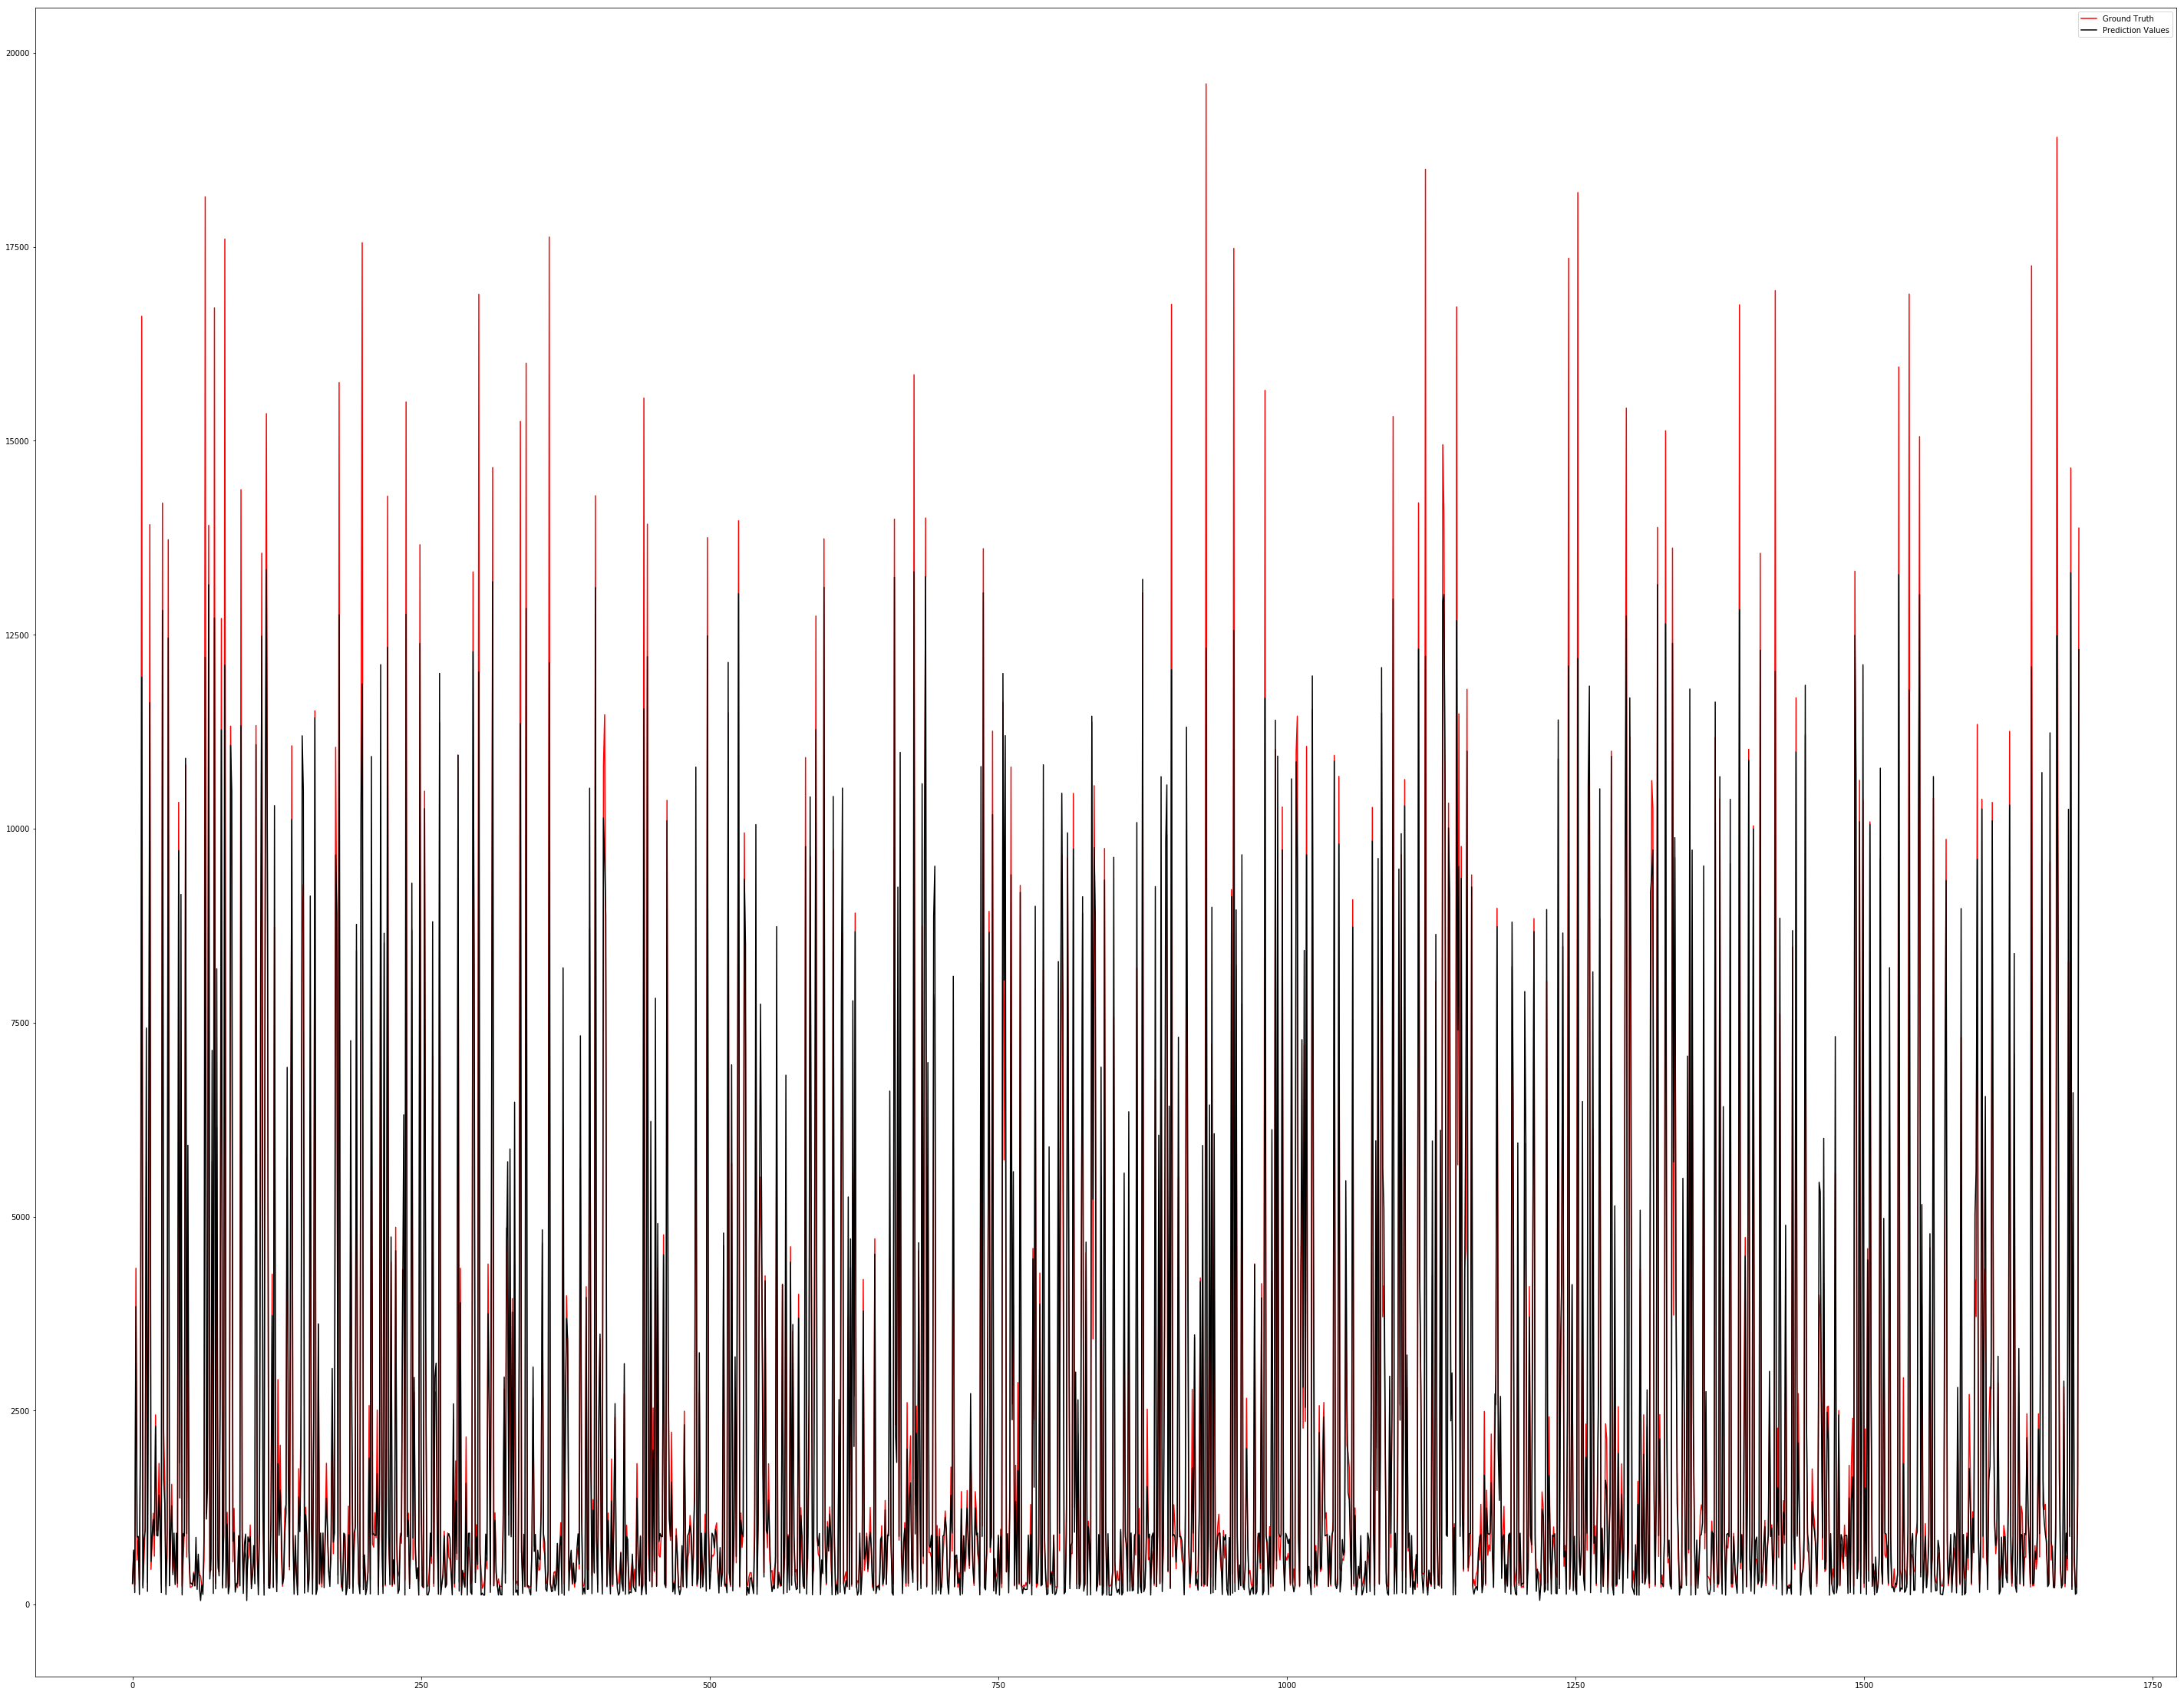

In [45]:
y_test_inv = scale.inverse_transform(y_test)
y_pred_inv = scale.inverse_transform(y_pred)

plt.figure(figsize=(50,40))
plt.plot(range(len(y_test)),y_test_inv,color='red',label='Ground Truth')
plt.plot(range(len(y_pred)),y_pred_inv,color='black',label='Prediction Values')
plt.legend()
plt.show()